### Home Assigment 1, CMPE 252, Section 02, FALL 2022, San Jose State University
#### Informative Search using A* Algorithm and its comparison to uninformed search (BFS, Dijkstra)
All the required utility functions are provided at the beginning of this notebook. There are 8 tasks 
after the utility functions. This assignment is individual. The deadline is Sep 27, 2022. The submission is in Canvas.

import the necessary libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import networkx as nx
%matplotlib inline

'build_maze' builds the maze from 'maze_file.txt'.

In [2]:
def build_maze(maze_file):
    '''
    para1: filename of the maze txt file
    return mazes as a numpy array walls: 0 - no wall, 1 - wall in the maze
    '''
    a = open(maze_file, 'r')  
    m=[]
    for i in a.readlines():
        m.append(np.array(i.split(" "), dtype="int32"))
    return np.array(m)

define START and GOAL states within the maze

***Visualize the maze***: 

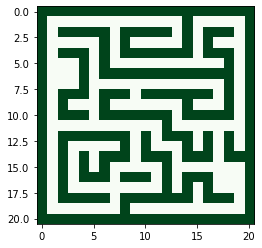

In [3]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("maze_20x20.txt"), cmap='Greens')

In [4]:
START=(1, 1)
GOAL=(19,19)
# GOAL=(25, 25)
# Goal for 50X50 maze is (1,49)

'Find_the_edges' builds the graph for the maze, assuming that the robot can move only in the four directions (Up, Down, Right, Left).

In [5]:
def Find_the_edges(maze):
    '''
    para1: numpy array of the maze structure
    return graph of the connected nodes
    '''
    graph={}
    grid_size=len(maze)
    for i in range(grid_size):
        for j in range(grid_size):
            if(maze[i][j]!=1):
                adj=[]
                eles=[]
                if i - 1 >= 0:
                    eles.append((i-1,j))
                if i + 1 < grid_size:
                    eles.append((i+1,j))
                if j - 1 >=0:
                    eles.append((i,j-1))
                if j+1< grid_size:
                    eles.append((i,j+1))
                for ele in eles:
                    if maze[ele[0]][ele[1]] == 0 or maze[ele[0]][ele[1]]=='3' :
                        adj.append((ele[0],ele[1]))
                graph[(i,j)]=adj
    return graph

### Breadth First Search (BFS)

In [6]:
from collections import deque
def BreadthFirst(graph, start, goal):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    queue = deque([([start], start)])
    visited = set()
    
    while queue:
        path, current = queue.popleft()
        #print(path, current)
        if current == goal:
            #print( path)
            return visited, np.array(path)
        if current in visited:
            continue
        #print(current)
        visited.add(current)
        for neighbour in graph[current]:
            #print(graph[current])
            p = list(path)
            p.append(neighbour)
            queue.append((p, neighbour))
    print(len(p))
    return None
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

In [7]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze1=build_maze("maze_20x20.txt")
graph=Find_the_edges(maze1)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze1[i[0],i[1]]=-3
for i in path:
    maze1[i[0],i[1]]=-1

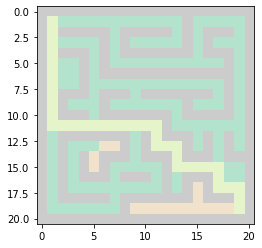

In [8]:
plt.imshow(maze1, cmap='Pastel2')

- ***gray cells*** means the walls of the maze
- ***dark green cells*** means the visited cells of the maze
- ***light green cells*** means the shortest path of the maze
- ***light brown*** means the unvisited cells of the maze

### A*-search

In [45]:
import heapq
import time

class PriorityQueue:
    def __init__(self):
        self.elements = []
    
    def empty(self) -> bool:
        return not self.elements
    
    def put(self, item, priority):
        heapq.heappush(self.elements, (priority, item))
    
    def get(self):
        return heapq.heappop(self.elements)[1]

def astar_path(graph, start, goal, function, weight):
    '''
    para1: connected graph
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    space_counter = 0
    begin_time = time.time()
    frontier = PriorityQueue()
    frontier.put(start, 0)
    came_from= {}
    cost_so_far= {}
    came_from[start] = None
    cost_so_far[start] = 0
    while not frontier.empty():
        current = frontier.get()
        if current == goal:
            break
        #print(graph[current])
        for next in (graph[current]):
            maze3[current]=-1
            new_cost = cost_so_far[current] + 1
            if next not in cost_so_far or new_cost < cost_so_far[next]:
                cost_so_far[next] = new_cost
                ######
                #you can make the interface of 'astar_path' more robust by providing a heuristic as a parameter
                ###
                #F = G + weight*H(p)
                priority = new_cost + function(next, goal)*weight
                space_counter+=1
                frontier.put(next, priority)
                came_from[next] = current
    current= goal
    path = []
    while current != start: 
        path.append(current)
        #print(came_from[current])
        current = came_from[current]
    path.append(start) 
    path.reverse() 
    finish_time = time.time()
    print("Space Nodes: ", space_counter)
    print("Runtime: ",finish_time - begin_time)
    return came_from, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    

'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Dijkstra Algorithm

In [10]:

def dijkstra_algorithm(graph, start_node, GOAL):
    '''
    para1: connected graph 
    para2: Starting node
    para3: ending Node
    return1: list of visited nodes
    return2: nodes of shortest path
    '''
    space_counter = 0
    unvisited_nodes = list(graph.keys())
 
    # We'll use this dict to save the cost of visiting each node and update it as we move along the graph   
    shortest_path = {}
 
    # We'll use this dict to save the shortest known path to a node found so far
    previous_nodes = {}
 
    # We'll use max_value to initialize the "infinity" value of the unvisited nodes   
    max_value = sys.maxsize
    for node in unvisited_nodes:
        shortest_path[node] = max_value
    # However, we initialize the starting node's value with 0   
    shortest_path[start_node] = 0
    
    # The algorithm executes until we visit all nodes
    while GOAL in unvisited_nodes:
        # The code block below finds the node with the lowest score
        current_min_node = None
        for node in unvisited_nodes: # Iterate over the nodes
            if current_min_node == None:
                current_min_node = node
            elif shortest_path[node] < shortest_path[current_min_node]:
                current_min_node = node
                
        # The code block below retrieves the current node's neighbors and updates their distances
        neighbors = graph[current_min_node]
        for neighbor in neighbors:
            tentative_value = shortest_path[current_min_node] + 1 
            if tentative_value < shortest_path[neighbor]:
                shortest_path[neighbor] = tentative_value
                # We also update the best path to the current node
                previous_nodes[neighbor] = current_min_node
                space_counter+=1
 
        # After visiting its neighbors, we mark the node as "visited"
        unvisited_nodes.remove(current_min_node)

    current= GOAL
    path = []
    while current != START: 
        path.append(current)
#         print(previous_nodes[current])
        current = previous_nodes[current]
    path.append(START) 
    path.reverse() 
    print("Length: ", len(path))
    print("Space Node: ", space_counter)
    return previous_nodes, path
'''
visited nodes - mark them as -3 in maze numpy array 
path- mark them as -1 in maze numpy array
and Visualize the maze
'''    


'\nvisited nodes - mark them as -3 in maze numpy array \npath- mark them as -1 in maze numpy array\nand Visualize the maze\n'

### Task - 1

Build your maze with dimentions 25 x 25 and a similar complexity (number of obstacles/fences) 
as in the maze provided in 'maze_20x20.txt'. Check that there exists a path between START at the 
(1, 1) and the GOAL at (25, 25) in your maze. Store your maze to 'my_maze_25x25.txt'. Visualize your maze. 
Use your maze in the below tasks. 

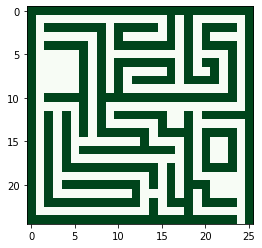

In [11]:
# (you are encouraged to look at the API of 'imshow')
plt.imshow(build_maze("my_maze_25x25.txt"), cmap='Greens')

In [12]:
START = (1,1)
GOAL = (24, 24)

In [13]:
#example for visualization of maze with visited nodes and shortest path
# visited nodes are marked by '-3', the final path is marked by '-1'.
maze2=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze2)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze2[i[0],i[1]]=-3
for i in path:
    maze2[i[0],i[1]]=-1

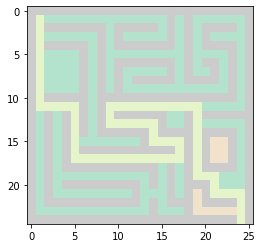

In [14]:
plt.imshow(maze2, cmap='Pastel2')

### Task - 2

A* algorithm requires a heuristic function. You will try two following heuristics:
- Euclidean distance
- Manhattan distance 

In [15]:
def Euclidean_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Euclidean distance between the 2 nodes
    '''
    return ((node1[0] - GOAL[0])**2 + (node2[1] - GOAL[1])**2)**0.5
    pass



In [16]:
# implement the Manhattan distance between the 2 nodes, and update the code for A* accordingly
def Manhattan_distance(node1, node2):
    '''
    para1: is a tuple which contains the coorinates of the source node
    para2: is a tuple which contains the coorinates of the source node
    return: Manhattan distance between the 2 nodes
    '''
#     refer to https://xlinux.nist.gov/dads/HTML/manhattanDistance.html
#     Manhattan Distance  = |node1 - node2|
    return (abs((node1[0] - GOAL[0])) + abs((node2[1] - GOAL[1])))

    pass

Run A* with these two heuristic functions for W=1 and find the shortest path and its length in the maze. You can update the interface of astar_path to accept W and a heuristic function

### A* algorithm with Euclidean Distance heuristic

In [2]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

NameError: name 'build_maze' is not defined

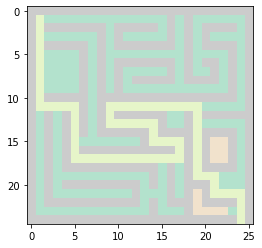

In [18]:
plt.imshow(maze3, cmap='Pastel2')

### A* algorithm with Manhattan Distance Heruisitc

In [19]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Space Nodes:  304
Runtime:  0.00098419189453125


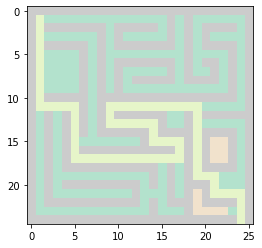

In [20]:
plt.imshow(maze3, cmap='Pastel2')

### Task - 3


In this task you are asked to solve the maze with 4 different weights, W, in A* for each of the heurstic function mentioned above. Visualize the solution for each W and each heurstic on a separate plot in the same format as in the examle above (see cell 17). ***Chose a broad set of values for W to see the difference.***

### A* algorithm with Euclidean Distance Heruisitc Function with 4 different weights

In [21]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 5)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Space Nodes:  276
Runtime:  0.0014646053314208984


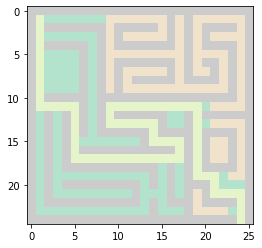

In [22]:
plt.imshow(maze3, cmap='Pastel2')

In [3]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 10)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

NameError: name 'build_maze' is not defined

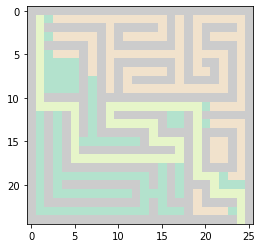

In [24]:
plt.imshow(maze3, cmap='Pastel2')

In [25]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 25)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Space Nodes:  306
Runtime:  0.001967191696166992


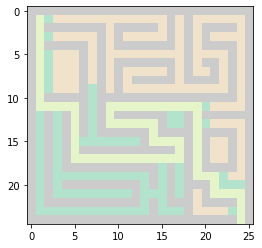

In [26]:
plt.imshow(maze3, cmap='Pastel2')

In [27]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 60)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Space Nodes:  312
Runtime:  0.0026121139526367188


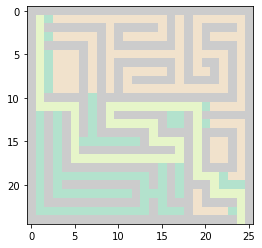

In [28]:
plt.imshow(maze3, cmap='Pastel2')

### A* algorithm with Manhattan Distance Heruisitc Function with 4 different weights

In [1]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 5)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

NameError: name 'build_maze' is not defined

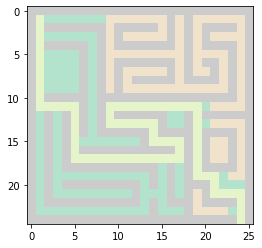

In [30]:
plt.imshow(maze3, cmap='Pastel2')

In [31]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 10)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Space Nodes:  289
Runtime:  0.0010356903076171875


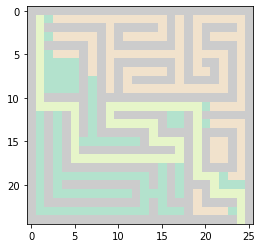

In [32]:
plt.imshow(maze3, cmap='Pastel2')

In [33]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 25)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Space Nodes:  306
Runtime:  0.00099945068359375


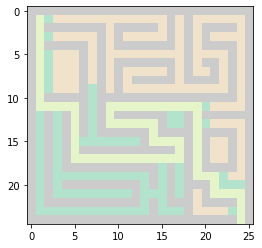

In [34]:
plt.imshow(maze3, cmap='Pastel2')

In [35]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 60)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Space Nodes:  312
Runtime:  0.001982450485229492


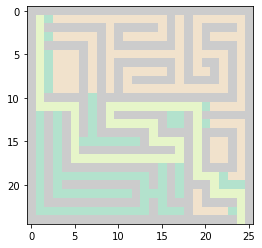

In [36]:
plt.imshow(maze3, cmap='Pastel2')

Explain what changes you observe for the different weights and why it occurs.

Comparing the visualization between heuristic functions: Euclidean Distance and Manhatten Distance. Both distance functions have similar path searches (refere to visualizations above). As I increased the weight for the astar_path(), there are less visited nodes denoted by the light brown color which means that the algorithm deams that that path is too long or obstacles longate the search space. The weight will increase the search algorithm "F(n) = G + w*H(n)" and determine which path is the shortest.

### Task - 4


Plot on plt.subplot(121) a) time taken VS Weights

Plot on plt.subplot(122) b) search space (expanded nodes) VS Weights

-- add titles, axis labels, and legends.

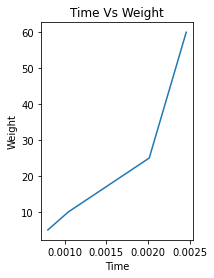

In [37]:
# Euclidean Distance Functions
weight = [5, 10, 25, 60]
#runtime may be subject to change per kernel restart
time = [0.0008, 0.001045, 0.002014, 0.002457]
plt.subplot(1,2,1)
plt.plot(time, weight)
plt.xlabel("Time")
plt.ylabel("Weight")
plt.title("Time Vs Weight")
plt.show()

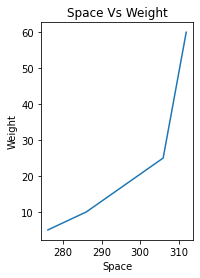

In [38]:
# Euclidean Distance Functions
weight = [5, 10, 25, 60]
#Space may be subject to change, but should be consistent
space = [276, 286, 306, 312]
plt.subplot(1,2,2)
plt.plot(space, weight)
plt.xlabel("Space")
plt.ylabel("Weight")
plt.title("Space Vs Weight")
plt.show()

### Task - 5

Solve the maze with the Dijkstra algorithm, and visualize the solution in the maze. What is the length of the shortest path?

In [39]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

Length:  75
Space Node:  305


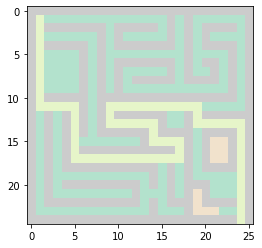

In [40]:
plt.imshow(maze3, cmap='Pastel2')

### Task - 6

Solve the maze with the BFS algorithm, and visualize the solution in the maze. What is the length of the shortest path?

In [41]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1

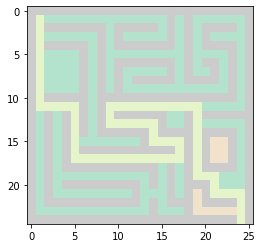

In [42]:
plt.imshow(maze3, cmap='Pastel2')

### Task - 7

Choose 3 random START and GOAL states, and repeat the tasks 2 - 6, and visualize the solution for each. Use W=1 in this task. Explain your observations.

Random 1: start and goal must not on an obstacle

In [43]:
START=(3, 2)
GOAL=(23,23)

Space Nodes:  304
Runtime:  0.0008699893951416016


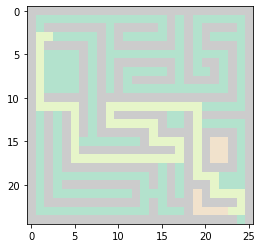

In [46]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Space Nodes:  304
Runtime:  0.001642465591430664


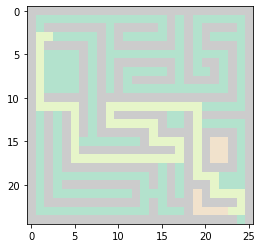

In [47]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Length:  74
Space Node:  305


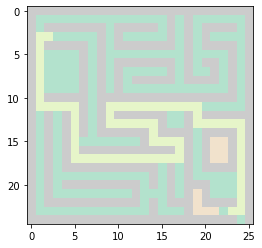

In [48]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

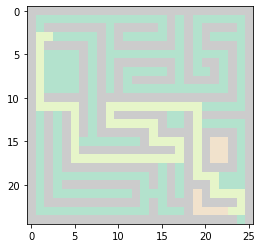

In [49]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

The different search algorithms have similar outputs. Most of the spaces search is around the same area, but dijkstra algorithm seems to have the best shortest path search. The amount of space nodes its going through and the visualization of light brown is greater compared to other algorithms and the total length is 49. 

### --------------------------------------------------------------------------------------------------------------------------------------------

Random 2

In [50]:
START = (5,2)
GOAL = (21,23)

Space Nodes:  280
Runtime:  0.0016410350799560547


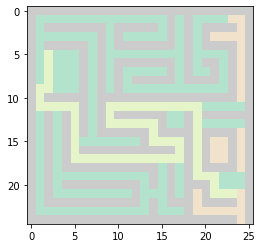

In [51]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Space Nodes:  280
Runtime:  0.0009119510650634766


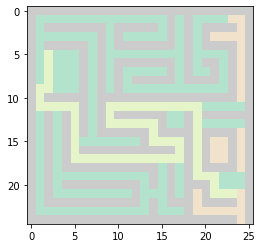

In [52]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Length:  68
Space Node:  300


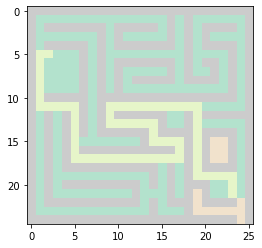

In [53]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

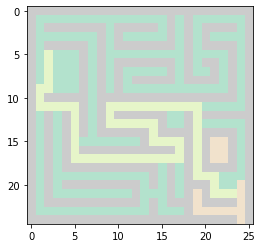

In [54]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Compared to Random 1 where dijkstra was the best serach, astar_path algorithm is a better fit for searching the shortest path. The best way to denote this is by observing the visuals. Firstly, dijkstra length has increased to 68 and there are less unvisited nodes. Looking at astar_path we see a lot more light brown indicating that there were more unvisited nodes giving the better path.

### --------------------------------------------------------------------------------------------------------------------------------------------

Random 3

In [55]:
START = (11,7)
GOAL = (11,23)

Space Nodes:  235
Runtime:  0.001001119613647461


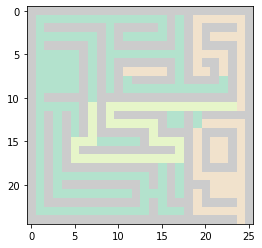

In [56]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Space Nodes:  235
Runtime:  0.0009989738464355469


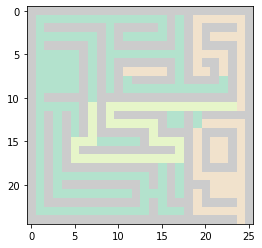

In [57]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Manhattan_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Length:  49
Space Node:  245


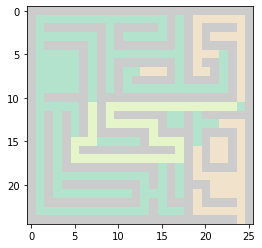

In [58]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

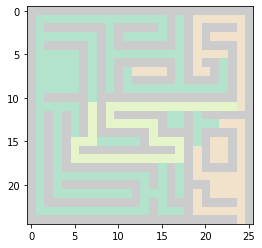

In [59]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

By looking at the visual representation and space nodes, all the algorithms are very similar in output. Space nodes are in the same range 230-245 and unvisited nodes are the same.

### Task - 8

The initally assumation which we made in the Find_the_edges() is the robot can only move in UP, DOWN, LEFT and RIGHT. Now it can diagonally also. So, Modifiy the function and repeat the tasks from 1-6 (and visualize the solution for each). Use W=1 in this task. Explain your observations

In [60]:
START = (1,1)
GOAL = (24, 24)

Space Nodes:  304
Runtime:  0.0008046627044677734


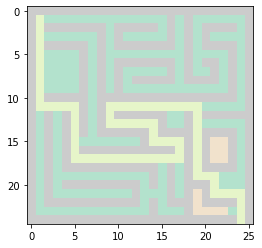

In [61]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 1)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Space Nodes:  276
Runtime:  0.0009686946868896484


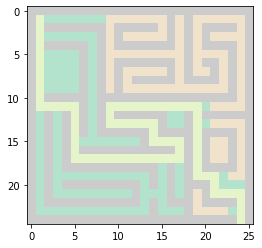

In [62]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 5)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Space Nodes:  289
Runtime:  0.001003265380859375


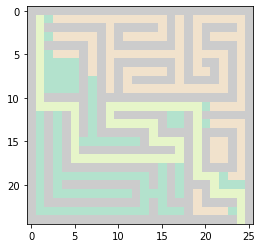

In [63]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 10)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Space Nodes:  306
Runtime:  0.0011909008026123047


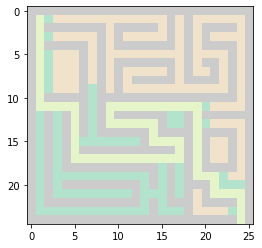

In [64]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 25)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

Space Nodes:  312
Runtime:  0.0009012222290039062


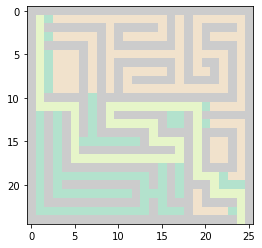

In [65]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = astar_path(graph, START, GOAL, Euclidean_distance, 60)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

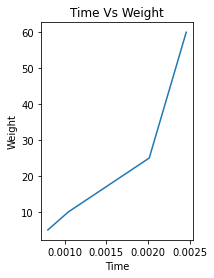

In [66]:
# Euclidean Distance Functions
weight = [5, 10, 25, 60]
#runtime may be subject to change per kernel restart
time = [0.0008, 0.001045, 0.002014, 0.002457]
plt.subplot(1,2,1)
plt.plot(time, weight)
plt.xlabel("Time")
plt.ylabel("Weight")
plt.title("Time Vs Weight")
plt.show()

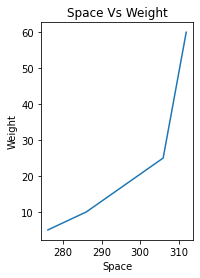

In [67]:
# Euclidean Distance Functions
weight = [5, 10, 25, 60]
#Space may be subject to change, but should be consistent
space = [276, 286, 306, 312]
plt.subplot(1,2,2)
plt.plot(space, weight)
plt.xlabel("Space")
plt.ylabel("Weight")
plt.title("Space Vs Weight")
plt.show()

Length:  75
Space Node:  305


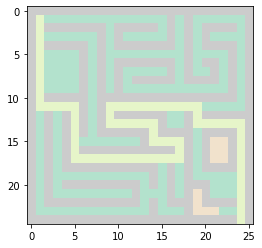

In [68]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = dijkstra_algorithm(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')

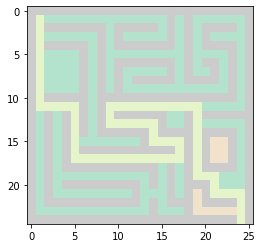

In [69]:
maze3=build_maze("my_maze_25x25.txt")
graph=Find_the_edges(maze3)
visited, path = BreadthFirst(graph, START, GOAL)
for i in visited:
    maze3[i[0],i[1]]=-3
for i in path:
    maze3[i[0],i[1]]=-1
    
plt.imshow(maze3, cmap='Pastel2')